In [5]:
!pip install scikit-learn statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import sklearn

# Regresi
## Model yang menghasilkan angka daripada kelas/kategori

In [7]:
x = int(input())
y = 2*x+3
print(y)

10
23


# Import Libraries

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [9]:
%matplotlib inline

# Simple Linear Regression

In [10]:
x = np.array([5,15,25,35,45,55])
y = np.array([5,20,14,32,22,38])

In [11]:
x = np.array([5,15,25,35,45,55]).reshape((-1,1))
y = np.array([5,20,14,32,22,38])

In [12]:
print(x)
print(y)

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
[ 5 20 14 32 22 38]


In [13]:
model = LinearRegression()

In [14]:
model.fit(x,y)

LinearRegression()

In [15]:
r_sq = model.score(x,y)
r_sq

0.7158756137479542

In [16]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 5.633333333333329
slope: [0.54]


In [17]:
print('Formula dari Model adalah y = ', model.coef_[0], 'x + ', model.intercept_)

Formula dari Model adalah y =  0.54 x +  5.633333333333329


In [18]:
y_pred = model.predict(x)
y_pred

array([ 8.33333333, 13.73333333, 19.13333333, 24.53333333, 29.93333333,
       35.33333333])

In [19]:
print(x)
print(y)

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
[ 5 20 14 32 22 38]


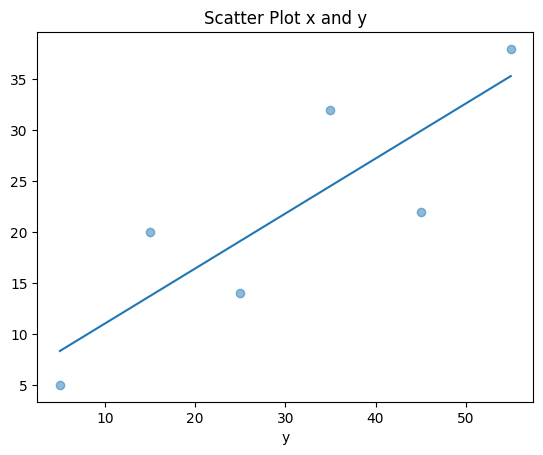

In [20]:
plt.scatter(x,y,alpha=0.5)
plt.plot(x,y_pred)

plt.title('Scatter Plot x and y')
plt.xlabel('x')
plt.xlabel('y')
plt.show()

In [21]:
x_new = np.arange(5,20,5).reshape([-1,1])
print(x_new)

[[ 5]
 [10]
 [15]]


In [22]:
y_new_pred = model.predict(x_new)
print(y_new_pred)

[ 8.33333333 11.03333333 13.73333333]


# Multiple Linear Regression

In [23]:
x = np.array([[0,1],
              [5,1],
              [15,2],
              [25,5],
              [35,11],
              [45,15],
              [55,34],
              [60,35]])
y = np.array([4,5,20,14,32,22,38,43])

print(x,'\n',y)

[[ 0  1]
 [ 5  1]
 [15  2]
 [25  5]
 [35 11]
 [45 15]
 [55 34]
 [60 35]] 
 [ 4  5 20 14 32 22 38 43]


In [24]:
model = LinearRegression()

In [25]:
model.fit(x,y)

LinearRegression()

In [26]:
r_sq_multi = model.score(x,y)
r_sq_multi

0.8615939258756776

In [27]:
model.intercept_

5.52257927519819

In [28]:
model.coef_

array([0.44706965, 0.25502548])

In [29]:
print('Formula multiple linreg adalah ', model.coef_[0], 'x1 +',model.coef_[1], 'x2 + ',model.intercept_)

Formula multiple linreg adalah  0.44706964892412215 x1 + 0.25502548131370345 x2 +  5.52257927519819


In [30]:
y_pred_multi = model.predict(x)

In [31]:
y_pred_multi

array([ 5.77760476,  8.012953  , 12.73867497, 17.9744479 , 23.97529728,
       29.4660957 , 38.78227633, 41.27265006])

In [32]:
y

array([ 4,  5, 20, 14, 32, 22, 38, 43])

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [34]:
mse_multi = mean_squared_error(y,y_pred_multi)
mse_multi

25.56187181483579

In [35]:
rmse = (mse_multi)**0.5
rmse

5.055874980142981

# Polynomial Regression

In [36]:
from sklearn.preprocessing import PolynomialFeatures

In [37]:
x = np.array([5,15,25,35,45,55]).reshape([-1,1])
y = np.array([15,11,2,8,25,32])

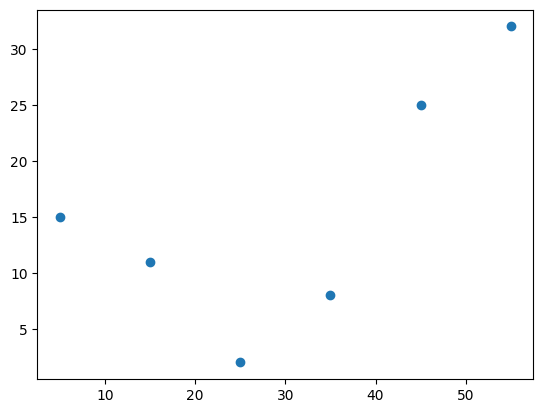

In [38]:
plt.scatter(x,y)

In [39]:
model = LinearRegression()

In [40]:
model.fit(x,y)
y_pred = model.predict(x)

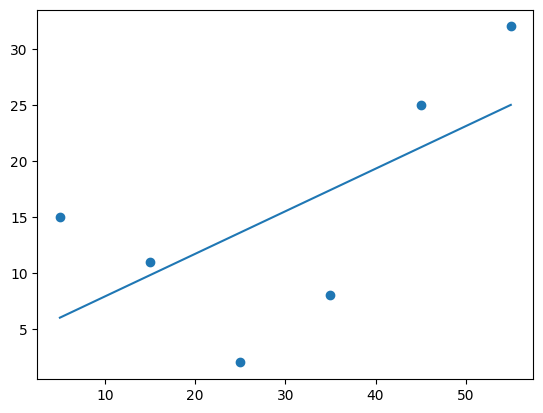

In [41]:
plt.scatter(x,y)
plt.plot(x,y_pred)

In [42]:
model.score(x,y)

0.4065969428801286

In [43]:
transformer = PolynomialFeatures(include_bias = False)

In [44]:
transformer.fit(x)

PolynomialFeatures(include_bias=False)

In [45]:
x_poly = transformer.transform(x)
x_poly

array([[   5.,   25.],
       [  15.,  225.],
       [  25.,  625.],
       [  35., 1225.],
       [  45., 2025.],
       [  55., 3025.]])

In [46]:
x_poly = transformer.fit_transform(x)

In [47]:
model_poly = LinearRegression()
model_poly.fit(x_poly,y)

LinearRegression()

In [48]:
model_poly.score(x_poly,y)

0.8908516262498564

In [49]:
model.score(x,y)

0.4065969428801286

In [50]:
y_poly_pred = model_poly.predict(x_poly)

In [51]:
y

array([15, 11,  2,  8, 25, 32])

In [52]:
y_poly_pred

array([15.46428571,  7.90714286,  6.02857143,  9.82857143, 19.30714286,
       34.46428571])

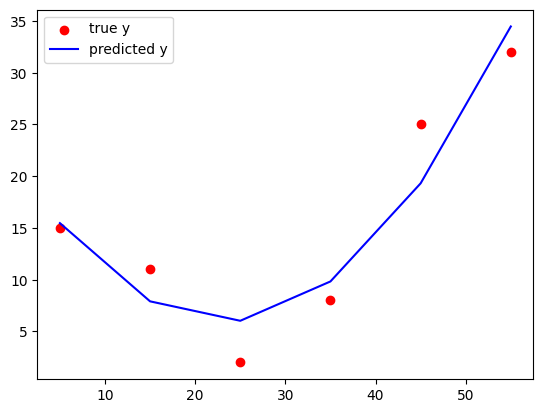

In [53]:
plt.scatter(x,y,color='red',label='true y')
plt.plot(x,y_poly_pred, color='blue',label='predicted y')
plt.legend()
plt.show()

# Multiple Polynomial Regression

In [54]:
x = np.array([[0,1],
              [5,1],
              [15,2],
              [25,5],
              [35,11],
              [45,15],
              [55,34],
              [60,35]])
y = np.array([4,5,20,14,32,22,38,43])

In [55]:
x_poly = transformer.fit_transform(x)
model_poly = LinearRegression()
model = LinearRegression()
model_poly.fit(x_poly,y)
model.fit(x,y)

LinearRegression()

In [56]:
print(model.score(x,y),model_poly.score(x_poly,y))

0.8615939258756776 0.9453701449127822


In [57]:
x_0 = [i[0] for i in x]

In [58]:
x_1 = [i[1] for i in x]

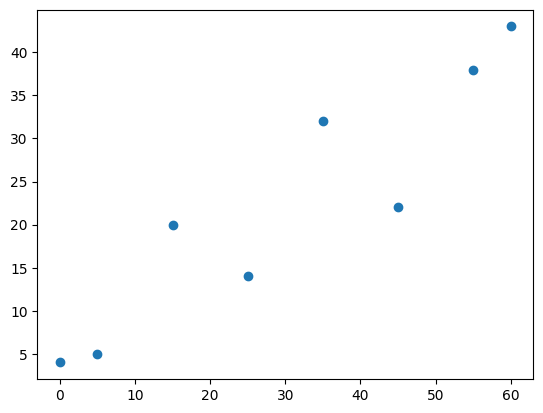

In [59]:
plt.scatter(x_0,y)

In [66]:
y_pred = model.predict(x)
y_pred_poly = model_poly.predict(x_poly)
mse = mean_squared_error(y,y_pred)
mse_poly = mean_squared_error(y,y_pred_poly)
rmse = np.sqrt(mse)
rsme_poly = np.sqrt(mse_poly)
print(rmse,rmse_poly)

5.055874980142981 3.1763896740514284


# Advanced Linear Regression with Statsmodels

In [67]:
import statsmodels.api as sm

In [68]:
x = np.array([[0,1],
              [5,1],
              [15,2],
              [25,5],
              [35,11],
              [45,15],
              [55,34],
              [60,35]])
y = np.array([4,5,20,14,32,22,38,43])

In [69]:
x = sm.add_constant(x)

In [70]:
x

array([[ 1.,  0.,  1.],
       [ 1.,  5.,  1.],
       [ 1., 15.,  2.],
       [ 1., 25.,  5.],
       [ 1., 35., 11.],
       [ 1., 45., 15.],
       [ 1., 55., 34.],
       [ 1., 60., 35.]])

In [71]:
model_stat = sm.OLS(y,x)

In [72]:
results = model_stat.fit()

In [73]:
results.summary()

/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     15.56
Date:                Fri, 31 Mar 2023   Prob (F-statistic):            0.00713
Time:                        15:15:47   Log-Likelihood:                -24.316
No. Observations:                   8   AIC:                             54.63
Df Residuals:                       5   BIC:                             54.87
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5226      4.431      1.246      0.268      -5.867      16.912
x1             0.4471      0.285      1.567      0.178      -0.286       1.180
x2             0.2550      0.453      0.563      0.598      -0.910       1.420
==============================================================================
Omnibus:                        0.561   Durbin-Watson:                   3.268
Prob(Omnibus):                  0.755   Jarque-Bera (JB):                0.534
Skew:                           0.380   Prob(JB):                        0.766
Kurtosis:                       1.987   Cond. No.                         80.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
print('rsquared :',results.rsquared)

rsquared : 0.8615939258756776


In [75]:
results.params

array([5.52257928, 0.44706965, 0.25502548])

In [76]:
res_summary = results.summary()
res_summary.tables[1]

/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


,coef,std err,t,P>|t|,[0.025,0.975]
const,5.5226,4.431,1.246,0.268,-5.867,16.912
x1,0.4471,0.285,1.567,0.178,-0.286,1.180
x2,0.2550,0.453,0.563,0.598,-0.910,1.420


In [77]:
res_summary.tables[0]

Dep. Variable:,y,R-squared:,0.862
Model:,OLS,Adj. R-squared:,0.806
Method:,Least Squares,F-statistic:,15.56
Date:,"Fri, 31 Mar 2023",Prob (F-statistic):,0.00713
Time:,15:16:36,Log-Likelihood:,-24.316
No. Observations:,8,AIC:,54.63
Df Residuals:,5,BIC:,54.87
Df Model:,2,,
Covariance Type:,nonrobust,,


In [78]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     15.56
Date:                Fri, 31 Mar 2023   Prob (F-statistic):            0.00713
Time:                        15:17:15   Log-Likelihood:                -24.316
No. Observations:                   8   AIC:                             54.63
Df Residuals:                       5   BIC:                             54.87
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5226      4.431      1.246      0.2

In [79]:
results.predict(x)

array([ 5.77760476,  8.012953  , 12.73867497, 17.9744479 , 23.97529728,
       29.4660957 , 38.78227633, 41.27265006])

In [80]:
y_pred = results.predict(x)

In [81]:
mse = mean_squared_error(y,y_pred)

In [82]:
np.sqrt(mse)

5.055874980142981

# Implementing Linear Regression on Real Dataset

In [83]:
import statsmodels.api as sm
from sklearn import datasets
import pandas as pd

In [86]:
df = pd.read_csv('BostonHousing.csv') 

In [87]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [88]:
x = df.drop('medv',axis=1)
y = df['medv']

In [89]:
x = x[['rm']]
model = sm.OLS(y,x)
results = model.fit()
predictions = results.predict(x)
print(results.summary())


                                 OLS Regression Results                                
Dep. Variable:                   medv   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                              4615.
Date:                Fri, 31 Mar 2023   Prob (F-statistic):                   3.74e-256
Time:                        15:20:35   Log-Likelihood:                         -1747.1
No. Observations:                 506   AIC:                                      3496.
Df Residuals:                     505   BIC:                                      3500.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

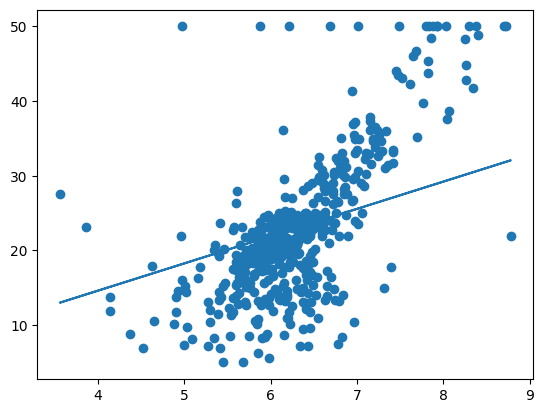

In [90]:
plt.scatter(x,y)
plt.plot(x,predictions)

# Use SKLEARN for Boston

In [91]:
X = df.drop('medv',1)
y = df['medv']

<ipython-input-91-92565aff0637>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop('medv',1)


In [92]:
linreg = LinearRegression()

In [93]:
linreg.fit(X,y)

LinearRegression()

In [94]:
y_pred = linreg.predict(X)

In [95]:
linreg.score(X,y)

0.7406426641094095

# Contoh kedua SKLEARN

In [96]:
df = pd.read_csv('CarPrice_Assignment.csv', usecols=['horsepower','price'])

In [97]:
df

,horsepower,price
0,111,13495.0
1,111,16500.0
2,154,16500.0
3,102,13950.0
4,115,17450.0
...,...,...
200,114,16845.0
201,160,19045.0
202,134,21485.0
203,106,22470.0


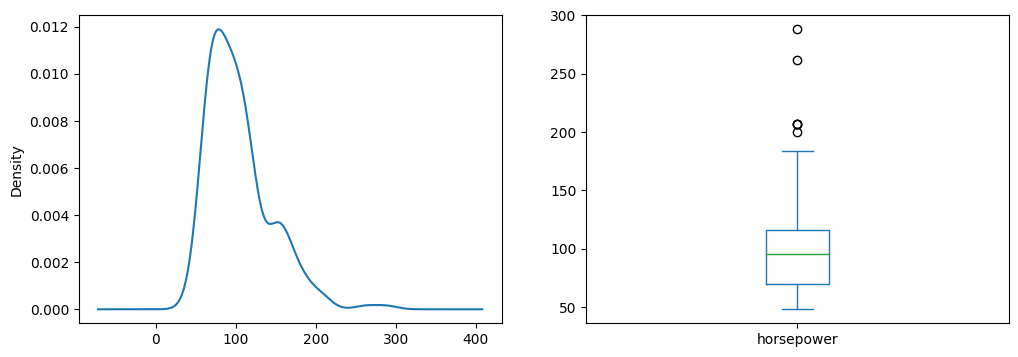

In [98]:
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['horsepower'].plot(kind='kde')

f.add_subplot(1,2,2)
df['horsepower'].plot(kind='box')

plt.show()

Text(0.5, 0, 'horsepower')

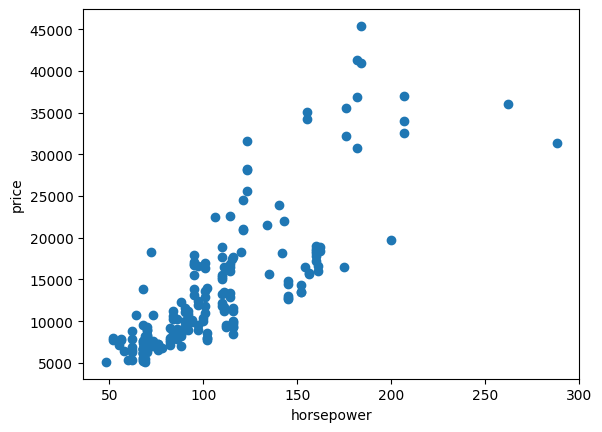

In [99]:
X = df['horsepower']
y = df['price']
plt.scatter(X,y)
plt.ylabel('price')
plt.xlabel('horsepower')
 

In [100]:
df.corr()

,horsepower,price
horsepower,1.000000,0.808139
price,0.808139,1.000000


In [101]:
X = X.to_frame()

# Data Splitting

In [102]:
from sklearn.model_selection import train_test_split

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [104]:
linreg = LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression()

In [105]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [106]:
linreg.score(X_train, y_train)

0.6061812778997111

In [107]:
y_pred = linreg.predict(X_test)

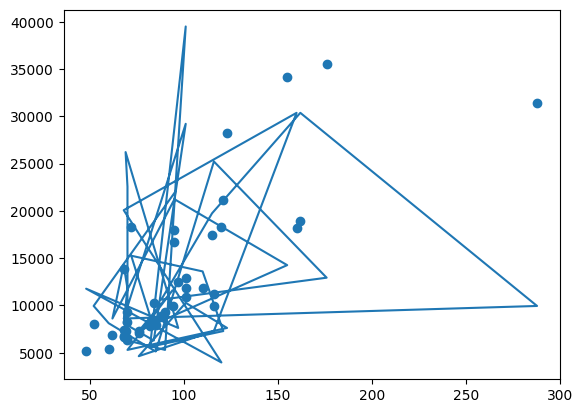

In [111]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred)

In [112]:
y_pred_train = linreg.predict(X_train)
y_pred_test = linreg.predict(X_test)

In [114]:
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test,y_pred_test)
rmse_tr = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('train mse : ', mse_train)
print('test mse : ', mse_test)
print('train rmse : ', rmse_tr)
print('test rmse : ', rmse_test)

train mse :  21841651.57191449
test mse :  22859844.05168516
train rmse :  4673.505276761169
test rmse :  4781.196926679047
